# Examining and Processing the data

We will examine GHG emissions from the [ons.gov.uk](https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsatmosphericemissionsgreenhousegasemissionsbyeconomicsectorandgasunitedkingdom) website. We will only be looking at the total GHG emissions and not seperate particular gases. I've extracted this data into a [table](https://github.com/JohN100x1/GHG_emissions/blob/master/GHG_emissions.csv).
The source code for this analysis can be found on https://github.com/JohN100x1/GHG_emissions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GHG_emissions = pd.read_csv("GHG_emissions.csv")
GHG_emissions

,Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Agriculture forestry and fishing,54667.9,54356.7,53949.2,53149.4,54274.5,54179.8,55061.4,54155.4,54107.6,...,46448.9,46473.7,46329.2,45966.7,48025.5,48002.3,48165.6,48767.4,48200.5,48585.6
1,Mining and quarrying,46561.7,47082.0,47618.5,47244.1,42960.3,44199.1,45485.6,44823.7,43633.0,...,26790.9,24307.8,22873.8,21461.9,21464.0,22738.1,21603.0,21955.5,21801.2,21785.5
2,Manufacturing,180059.7,181189.9,174062.0,168507.4,170908.6,168563.4,170097.7,169742.9,159886.5,...,97467.1,93253.2,89743.9,92287.6,91811.1,88940.0,84541.4,85654.3,84381.3,83654.7
3,Electricity gas steam and air conditioning supply,217166.6,213890.9,201849.5,184355.7,180890.8,178960.5,178659.8,163535.1,168957.6,...,175315.3,162382.6,176815.3,167750.5,146464.3,130386.0,108832.0,98661.6,94407.5,88395.1
4,Water supply sewerage waste management and rem...,67600.2,69114.7,69347.9,69583.6,69818.8,70688.7,71224.8,70118.4,71276.3,...,32184.9,30374.3,29224.8,26770.2,25121.2,25071.0,25013.9,25984.0,26294.8,26210.8
5,Construction,9499.0,9476.0,9590.9,9737.5,10194.3,10333.2,10638.6,10924.0,11200.7,...,12375.5,11759.1,12378.6,11607.7,12060.5,13075.2,13549.2,14051.8,14239.4,13827.1
6,Wholesale and retail trade repair of motor veh...,11683.0,12069.7,11890.2,12145.5,12536.3,12727.6,13050.2,12955.8,13365.6,...,17163.2,16897.4,17223.8,16953.8,16816.8,17012.6,17305.2,16918.8,16522.5,16056.0
7,Transport and storage,65461.7,65977.1,67046.8,68347.1,69241.2,72017.9,77623.2,78864.4,82104.7,...,84027.2,86620.3,81128.6,78381.8,81760.9,83824.2,84607.2,80967.2,87112.0,79546.2
8,Accommodation and food services,2776.2,3229.6,3027.2,3219.0,3206.1,3328.8,3544.1,3181.3,3406.1,...,3516.2,3190.8,3581.4,3668.1,3262.9,3503.0,3609.2,3581.4,3626.6,3595.7
9,Information and communication,1081.7,1162.6,1142.2,1191.2,1233.7,1275.3,1288.4,1229.8,1255.9,...,1012.3,960.3,978.6,938.1,892.6,906.2,926.7,887.8,856.3,844.3


The table shows the _Mass of air emissions per annum in thousand tonnes of carbon dioxide equivalent_ from each sector between 1990 to 2019. I have chosen this data to see which sectors contribute most to GHG emissions, and so to recommend more precise steps the UK governemnt can take with respect to those particular sectors.

We'll divide this data by $100,000$. This will cause the data to become _Mass of air emissions per annum in **100 mllion** tonnes of carbon dioxide equivalent_ instead. Next we will change the years to _years after 1990_. Both these changes will make the data easier to work with.

In [2]:
data = GHG_emissions[[str(x) for x in range(1990, 2020)]].to_numpy()
x_data, y_data = np.arange(1990, 2020)-1990, data/100000

Now let's plot the GHG emissions from $1990$ to $2019$ from the top $7$ sectors which contribute the most GHG emissions throughout this timeframe. We will restrict ourselves to analysing these top $7$ sectors since they contribute the most.

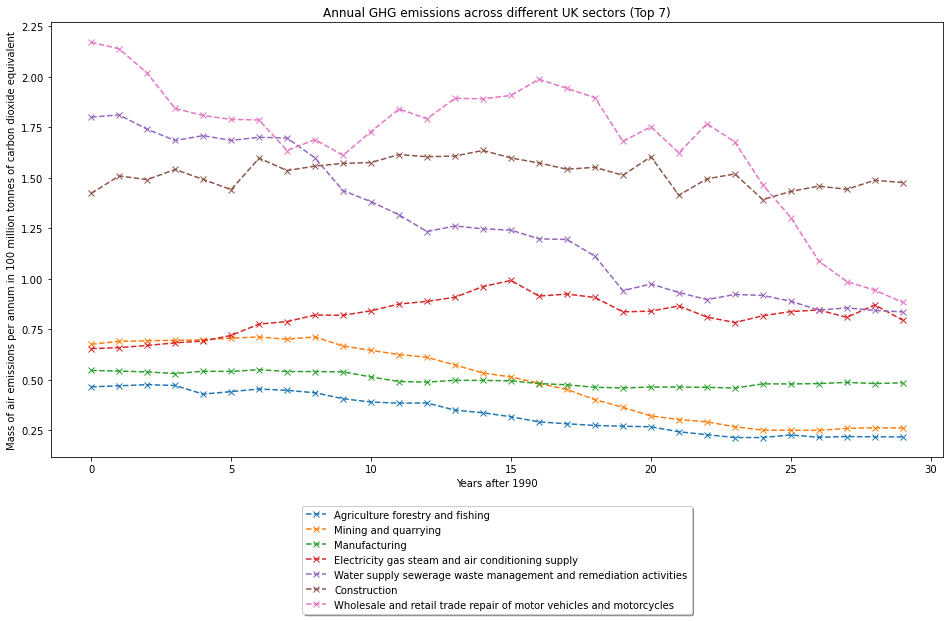

In [3]:
sector_sums = {i:sum(data[i,:]) for i in range(data.shape[0])}
top7 = sorted(sector_sums, key=sector_sums.get)[-7:]

fg0, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

# Plot the emissions
ax0.plot(x_data, y_data[top7,:].T,"--x")
ax0.set(xlabel="Years after 1990")
ax0.set(ylabel="Mass of air emissions per annum in 100 million tonnes of carbon dioxide equivalent")
ax0.set(title="Annual GHG emissions across different UK sectors (Top 7)")
ax0.legend(GHG_emissions.iloc[:,0],loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=1)

We can see that although total GHG emissions across all sectors is decreasing, some sectors - such as construction - stagnate. This is indicate perhaps GHG emission reduction efforts could more focused on a particular sector.

Here is a plot of the GHG emissions across summed all UK sectors for each year after $1990$.

[Text(0.5, 1.0, 'Annual GHG emissions across summed ALL 21 UK sectors')]

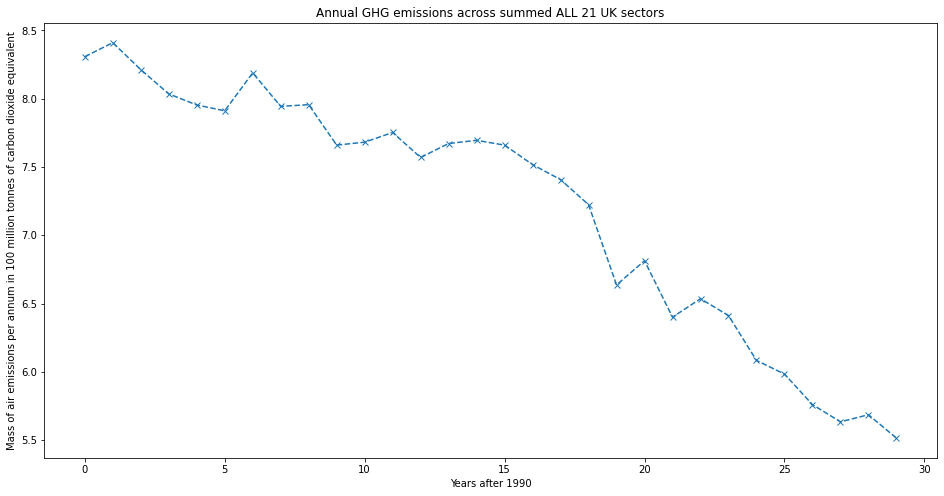

In [4]:
fg1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

# Plot the emissions
ax1.plot(x_data, np.sum(y_data, axis=0).T,"--x")
ax1.set(xlabel="Years after 1990")
ax1.set(ylabel="Mass of air emissions per annum in 100 million tonnes of carbon dioxide equivalent")
ax1.set(title="Annual GHG emissions across summed ALL 21 UK sectors")

# Modelling the data and evaluating the model

Before we consider a model, break this dataset into training, and test set. We will divide the dataset into an arbitrary ratio of $25:5$ respectively. We want to produce a model that predicts the GHG emissions based on a single feature - the year.

Based on the data, we suspect there's some correlation between the data based on the plot, so a linear regression may be appropriate.
For the model selection step, the dataset would have to be divided into an additional validation set and used to test other models such as time series models like an autoregressive or moving average model, but to keep this investigation brief I will just consider the linear regression model.

In [5]:
r1 = 25

x_train, y_train = x_data[:r1], y_data[top7,:][:,:r1]
x_test, y_test = x_data[r1:], y_data[top7,:][:,r1:]

### The Normal linear model
We will model each sector's emission with a linear regression.

Let $X\in\mathbb{R}^{25\times 2}$ be a vandermonde matrix with a column of $1$, $x_i$ where $x_i$ is the year after $1990$ and $y\in\mathbb{R}^{25}$ be the vector of emissions (in $100$ million tonnes) for each year. Then the Normal linear model is given by
$$y=X\beta +\epsilon$$
Where $\beta\in\mathbb{R}^2$ is a vector of some parameters and $\epsilon\in\mathbb{R}^{25}$ is a vector of i.i.d. normally distributed errors with zero mean. The parameter $\beta$ can be estimated using the least squares estimator $\hat{\beta}_{ls}$, which minimises the MSE of all linear unbiased estimators. This is given by
$$\hat{\beta}_{ls}=(X^TX)^{-1}X^Ty$$
Using the values from our training set, we can now plot the model using the predicted values $\hat{y}$, where
$$\hat{y}=X\hat{\beta}_{ls}$$
To evaluate the model, we can calculate the mean squared error.
$$MSE(\hat{y})=E\left[(y-\hat{y})^2\right]$$
We can calculate this value both for the training and test set. The mean squared errors for the training and test set are called the in-sample and out-sample MSE.

The Plots below show the Normal linear model applied to the top $7$ sectors (in terms of GHG emissions throughout $1990$ to $2019$).

In-sample MSE: [0.00028136 0.00288008 0.0001522  0.00511792 0.00381648 0.00432406
 0.01944652]
Out-sample MSE: [0.00209803 0.00212374 0.00186985 0.01391779 0.02333574 0.00628441
 0.38254843]


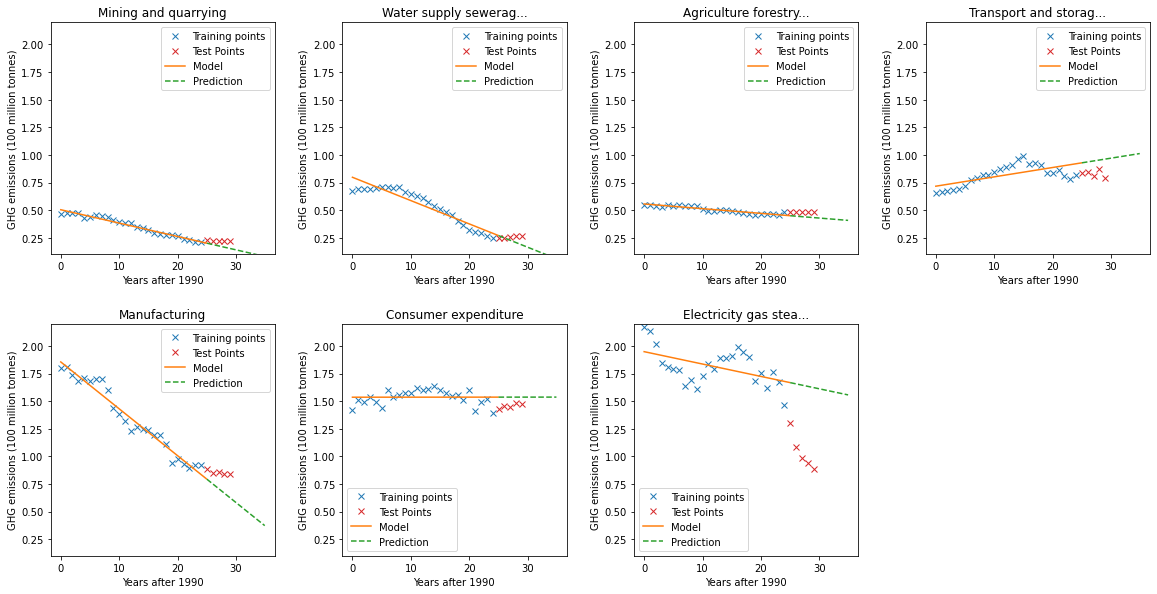

In [6]:
n = 2

def y_pred(X, beta):
    return X @ beta

# Form the design matrices
X_train = np.zeros((r1, n))
X_test = np.zeros((30-r1, n))
for i in range(n):
    X_train[:,i] = x_train**i
    X_test[:,i] = x_test**i

beta_ls = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train.T)

x_train_pred = np.arange(0, r1, 0.1)
x_test_pred = np.arange(r1, 35, 0.1)
X_train_pred = np.zeros((len(x_train_pred), n))
X_test_pred = np.zeros((len(x_test_pred), n))
for i in range(n):
    X_train_pred[:,i] = x_train_pred**i
    X_test_pred[:,i] = x_test_pred**i

fg2, ax2 = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fg2.tight_layout()
fg2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
fg2.delaxes(ax2[1,3])
for i in range(2):
    for j in range(4):
        if i == 1 and j == 3:
            break
        ax2[i,j].plot(x_train, y_train[4*i+j,:].T, "x",color="tab:blue")
        ax2[i,j].plot(x_test, y_test[4*i+j,:].T, "x",color="tab:red")
        ax2[i,j].plot(x_train_pred, y_pred(X_train_pred, beta_ls[:,4*i+j]), color="tab:orange")
        ax2[i,j].plot(x_test_pred, y_pred(X_test_pred, beta_ls[:,4*i+j]),"--",color="tab:green")
        ax2[i,j].set(xlabel="Years after 1990")
        ax2[i,j].set(ylabel="GHG emissions (100 million tonnes)")
        ax2[i,j].set(title=GHG_emissions.iloc[top7[4*i+j],0][:20]+int(len(GHG_emissions.iloc[top7[4*i+j],0]) > 20)*"...")
        ax2[i,j].legend(["Training points", "Test Points", "Model", "Prediction"])
        ax2[i,j].set_ylim([0.1, 2.2])

# In-sample and Out-sample MSE for each sector
MSE_in_sample = np.mean((y_train - y_pred(X_train, beta_ls).T)**2, axis=1)
MSE_out_sample = np.mean((y_test - y_pred(X_test, beta_ls).T)**2, axis=1)
print("In-sample MSE: {}".format(MSE_in_sample))
print("Out-sample MSE: {}".format(MSE_out_sample))

# Evaluating the model

Based on the plot above and the fact that the mean squared error is much higher in the out-sample, it looks like the linear regression model is underfitting the data. In particular for electricity/gas/steam/air conditioning sector, it seems that GHG emission reduction have accelerated $18$ years after $1990$, i.e. after $2008$. It could be due to a particular event during/after $2008$ which caused the GHG emissions to reduce more than our model expected.

As for the other sectors, the Normal linear regression appear to be a good fit. We could do this by calculating $R^2$ for these models.

In [7]:
MSE_baseline = np.mean((y_train - np.mean(y_train, axis=1)[:,None])**2, axis=1)
R2 = 1-MSE_in_sample/MSE_baseline

# R2 values for each model
print(R2)

[9.64480327e-01 8.89590562e-01 8.60778484e-01 4.21588165e-01
 9.60902740e-01 8.94338984e-06 2.51906415e-01]


Models with $R^2$ close to $1$ are a good fit. Based on this, it appears the Normal linear model is not a good fit for the transport and electricity/gas/steam/air conditioning sector.

### Issues to note with the model

Although the normal linear model is simple to understand and work with, the underlying assumptions are difficult to apply. In particular, we assumed that the errors are independent from each other which may not be case if emissions in an earlier year have an effect on emissions in later years (i.e. emissions are dependent). Another assumption we've made is that the emissions follow a linear trend which may not be the case in real life since it would be difficult for the UK to completely stop emissions in the distant future which this model suggests (e.g. the line will touch the $x$-axis somewhere in the near future). Extrapolation from this model would therefore not be suitable up to a certain year.

### Improvements to make with the model
For sectors such as agriculture, mining, manufacturing, and water/sewerage, the model more or less fits the data. However, the test points slightly lie above the prediction line of our model. One way to resolve this issue is to use a ridge regression instead, which would cause shrinkage in the $\beta$ parameter, thus reducing the gradient of the prediction line to be more closely aligned with the test points.

# Summary and Implications for the UK government
First let's examine the gradients of our model. This tells us the rate of change in GHG emissions per year.

In [8]:
gradients = pd.DataFrame(GHG_emissions.iloc[top7,0])
gradients["Gradient"] = beta_ls[1,:]
gradients

,Sector,Gradient
1,Mining and quarrying,-0.012121
4,Water supply sewerage waste management and rem...,-0.021125
0,Agriculture forestry and fishing,-0.004254
7,Transport and storage,0.008470
2,Manufacturing,-0.042471
20,Consumer expenditure,0.000027
3,Electricity gas steam and air conditioning supply,-0.011222


As shown on the table above, most of the gradients are negative, indicating GHG emissions are decreasing per year for that sector. The greatest being Manufacturing at an average rate of about $4.2$ million tonnes ($CO_2$ equivalent) per year.

The rate of change for Consumer expenditure is negligible and close to zero while for transport and storage the rate is increasing. Although the GHG emissions for transport is increasing, this could indicate more people are using public transport, which is a good thing. A more thorough analysis on the breakdown of transport is needed. As for consumer expenditure, more needs to be done by the UK government to reduce GHG emissions from consumers.